In [79]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular, Unit
from py_ballisticcalc import DragModel, TableG1
from py_ballisticcalc import Ammo
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

Set.Units.distance = Unit.METER
Set.Units.velocity = Unit.MPS
Set.Units.sight_height = Unit.CENTIMETER
Set.Units.adjustment = Unit.MIL

In [80]:
# Define standard .51
dm = DragModel(0.62, TableG1, 661, 0.51)
ammo = Ammo(dm, 2.3, 837)

In [81]:
# Establish 500-meter zero at 0 degree horizontal look
weapon = Weapon(9, 500, 15)
calc = Calculator(weapon, ammo)
zero_elevation = calc.elevation
print(f'Barrel elevation for zero: {zero_elevation << Unit.MIL}')

Barrel elevation for zero: 4.62MIL


In [82]:
# Now we spot aerial target through the sight, which gives us a look angle and distance to the target.
# We want to know sight adjustment to make that hit.

# We spot a target and sight reports elevation is 30 degrees and distance is 1000m
target_elevation = Unit.DEGREE(30)
target_distance = 500
# Solve for barrel elevation to hit:
weapon = Weapon(9, target_distance, 15, target_elevation)
calc = Calculator(weapon, ammo)
barrel_elevation = calc.elevation
# Solve for sight adjustment from zero to hit:
barrel_minus_sight_mils = (barrel_elevation >> Angular.Mil) - (target_elevation >> Angular.Mil)
fire_solution_mils = barrel_minus_sight_mils - (zero_elevation >> Angular.Mil)
print(f'Barrel elevation to hit target at {target_elevation << Unit.DEGREE}, {target_distance}m: {barrel_elevation << Unit.MIL}')
print(f'Difference between sight line and barrel elevation is now {barrel_minus_sight_mils:.2f}MIL')
print(f'Sight adjustment to hit target is {fire_solution_mils:.2f}MIL')

Barrel elevation to hit target at 30.0°, 500m: 537.37MIL
Difference between sight line and barrel elevation is now 4.04MIL
Sight adjustment to hit target is -0.58MIL


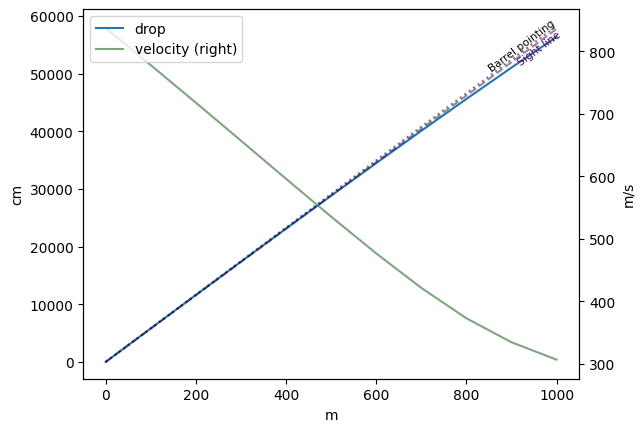

In [83]:
shot = Shot(1000, zero_angle=Unit.MIL(barrel_minus_sight_mils), relative_angle=target_elevation)
shot_result = calc.fire(shot, 100, extra_data=False)
ax = shot_result.plot(look_angle=target_elevation)
# Find danger space for a half-meter tall target at 300 yards
# danger_space = shot_result.danger_space(
#     1000, 5, Unit.MIL(0)
# )
# print(danger_space)
# # Highlight danger space on the plot
# danger_space.overlay(ax)
plt.show()

In [84]:
shot_result.dataframe.to_clipboard()